In [1]:
import pandas as pd
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import dummy
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC




In [2]:
db = pd.read_csv('glass.csv')

# Exercise 1 

1.How many classes has the data set?
-there are 6 classes (1,2,3,5,6,7)

In [3]:
np.unique(db["Type"])

array([1, 2, 3, 5, 6, 7])

In [4]:
db.keys()

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

2- Does the data set contain null-values? No, it doesn't

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


3-How many instances has each class? Include the histogram of the classes.

In [6]:
db.dtypes
db["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

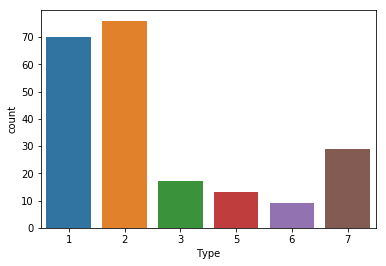

In [7]:
sn.countplot(db['Type'])
plt.show()

4-Is the data set balanced? If not, which is the class with less number of instances?
it is not balance, class 6 has the lower number of instance 9. (4.2% of the entire dataset)

In [8]:
#most populated classes
p = (76+70+29+17+13+9)
last_class = (9)
last_class/p
# of the instances belong type 1 and 2 together 

0.04205607476635514

5-Describe the distribution of the variables of the dataset

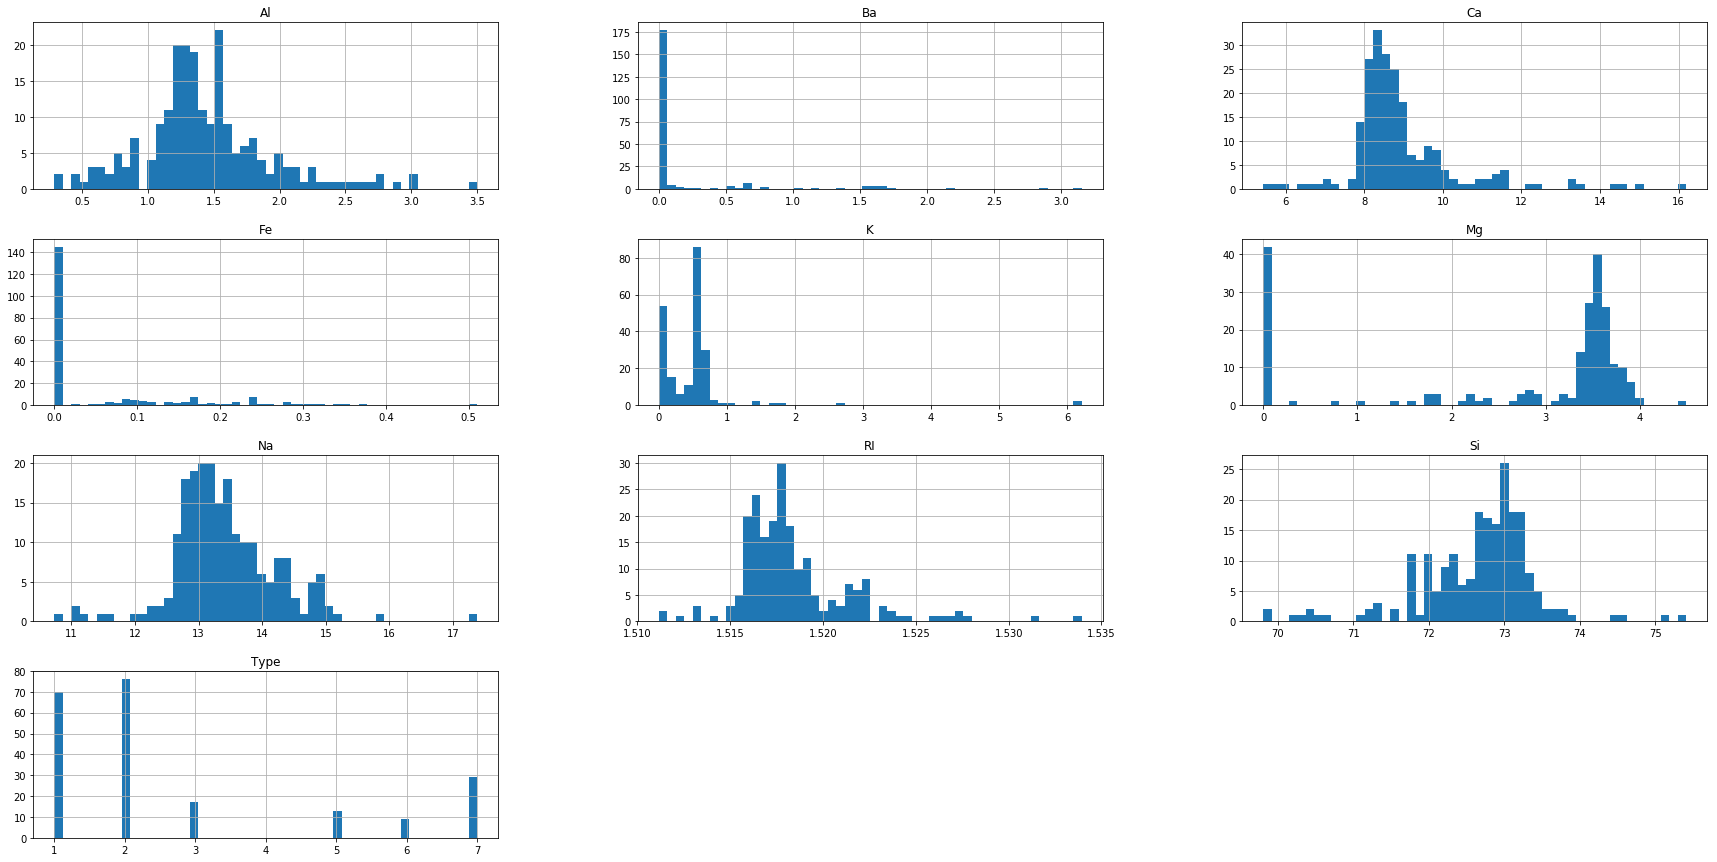

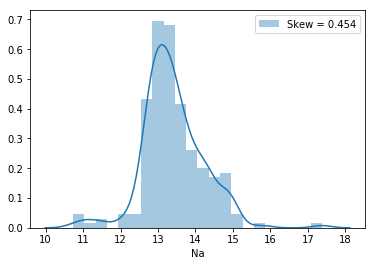

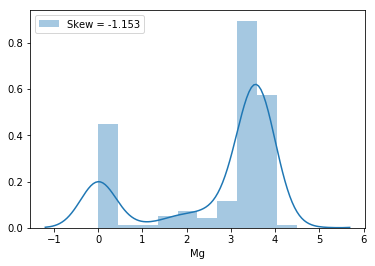

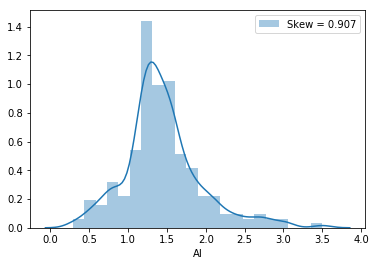

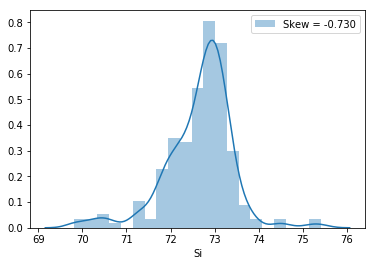

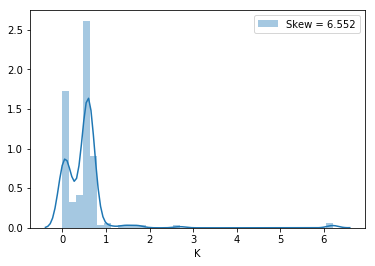

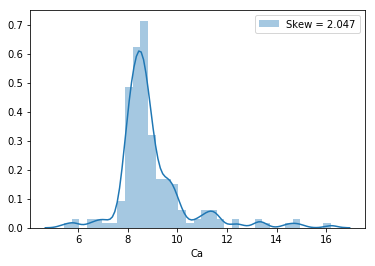

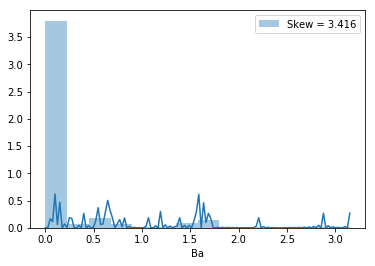

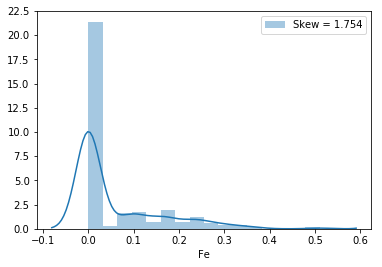

In [9]:
features = db.columns[:-1].tolist()
db["Type"].value_counts() 
db.hist(bins=50, figsize=(30,15))
for i in features:
    skew = db[i].skew()
    sn.distplot(db[i], label='Skew = %.3f' %(skew))
    plt.legend(loc='best')
    plt.show()

# Exercise 2

1-Based on the size of the data set, which of the train-test sets divisions techniques we have seen, would you use?

Unbalnced dataset suggests prefer using cross validation technique. If we use one sinle random split is likely that the smaller reppresentative class would be excluded. Instead using CV, the probability to consider all the classes properly is higher.*Stratified cross-validation*: folds are stratified so that class dist. in each fold is approx. the same as that in the initial data

In [10]:
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]
kf = KFold(n_splits=5,random_state=8, shuffle=True)
kf.get_n_splits(X)

# we divide the datasets in 5 folds, we use 8 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

TRAIN: [  2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  24  28  29  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  79  81  82  83
  84  85  86  87  89  90  91  92  93  95  96  98  99 102 104 105 107 108
 109 110 111 112 113 115 116 118 119 120 121 122 123 125 126 128 129 130
 131 133 134 135 136 137 138 139 140 142 143 145 146 147 148 149 151 152
 153 154 155 156 158 159 160 163 165 167 169 170 171 173 175 176 177 178
 179 180 181 184 185 186 187 188 189 191 192 193 194 195 196 199 201 202
 203 204 205 206 207 208 209 211 213] TEST: [  0   1   5  23  25  26  27  30  65  77  78  80  88  94  97 100 101 103
 106 114 117 124 127 132 141 144 150 157 161 162 164 166 168 172 174 182
 183 190 197 198 200 210 212]
TRAIN: [  0   1   2   5   6   7   8   9  11  13  14  15  16  18  19  20  21  22
  23  25  26  27  28  29  30  31  32

2-Implement a Naive Base, k-NN and Random Guesess models with the default parameters. Do not use features normalization. Which of the models present the highest accuracy?

KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)



In [12]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
pred = knn.predict(X_test)

In [14]:
y_test


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  3.,  3.,  5.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.])

In [15]:
accKNN = accuracy_score(y_test, pred) * 100
f1KNN = f1_score(y_test,pred,average='weighted')*100
precisionKNN = precision_score(y_test, pred,average='weighted')*100
recallKNN = recall_score(y_test, pred,average='weighted')*100
print('\nThe accuracy of the Knn classifier for k = 3 is %d%%' % accKNN)
print('\nThe f1 scoring of Knn classifier  is %d%%' % f1KNN)
print('\nThe precision of the Knn classifier  is %d%%' % precisionKNN)
print('\nThe recall of the knn classifier  is %d%%' % recallKNN)


The accuracy of the Knn classifier for k = 3 is 69%

The f1 scoring of Knn classifier  is 67%

The precision of the Knn classifier  is 68%

The recall of the knn classifier  is 69%


NB

In [16]:
from sklearn.naive_bayes import GaussianNB


In [17]:
NB= GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [18]:
predicts = NB.predict(X_test)

In [19]:
accNB = accuracy_score(y_test, predicts)*100
f1NB = f1_score(y_test,predicts,average='weighted')*100
precisionNB = precision_score(y_test, predicts,average='weighted')*100
recallNB = recall_score(y_test, predicts,average='weighted')*100
print('\nThe accuracy of the NBclassifier is %d%%' % accNB)
print('\nThe f1 scoring of NB classifier  is %d%%' % f1NB)
print('\nThe precision of the NB classifier  is %d%%' % precisionNB)
print('\nThe recall of the NB classifier  is %d%%' % recallNB)



The accuracy of the NBclassifier is 47%

The f1 scoring of NB classifier  is 40%

The precision of the NB classifier  is 49%

The recall of the NB classifier  is 47%


/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Rondom Guess

In [20]:
RG = DummyClassifier(strategy='uniform')

In [21]:
RG.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

In [22]:
predict= RG.predict(X_test)

In [23]:
accRG = accuracy_score(y_test, predict)*100
f1RG = f1_score(y_test,predict,average='weighted')*100
precisionRG = precision_score(y_test, predict,average='weighted')*100
recallRG = recall_score(y_test, predict,average='weighted')*100
print('\nThe accuracy of the RG classifier is %d%%' % accRG)
print('\nThe f1 scoring of RG classifier  is %d%%' % f1RG)
print('\nThe precision of the RG classifier  is %d%%' % precisionRG)
print('\nThe recall of the RG classifier  is %d%%' % recallRG)



The accuracy of the RG classifier is 7%

The f1 scoring of RG classifier  is 6%

The precision of the RG classifier  is 8%

The recall of the RG classifier  is 7%


If you aim to have a small number of False Negatives (FN), which of the models would you pick? Why?

Recall= TP/(TP+FN) we pick the classifier with the highest Recall : The recall of the knn classifier  is 69%

# Exercise 3

Part 1

Using GridSearchCV tune the parameters of the k-NN to improve its performance. Before applying GridSearchCV, divide the dataset in train and test set using the random split. Use the seed = 4 and the test set size = 30%. In particular verify with which of the number of neighbors among [1:100], k-NN gets the best performance, in terms of precision, recall, accuracy and F1. Which are the best number of neighbors, for these metrics? Report the metrics, are they increased?

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_f1_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Paolo/anaconda3/

Text(0,0.5,'Score')

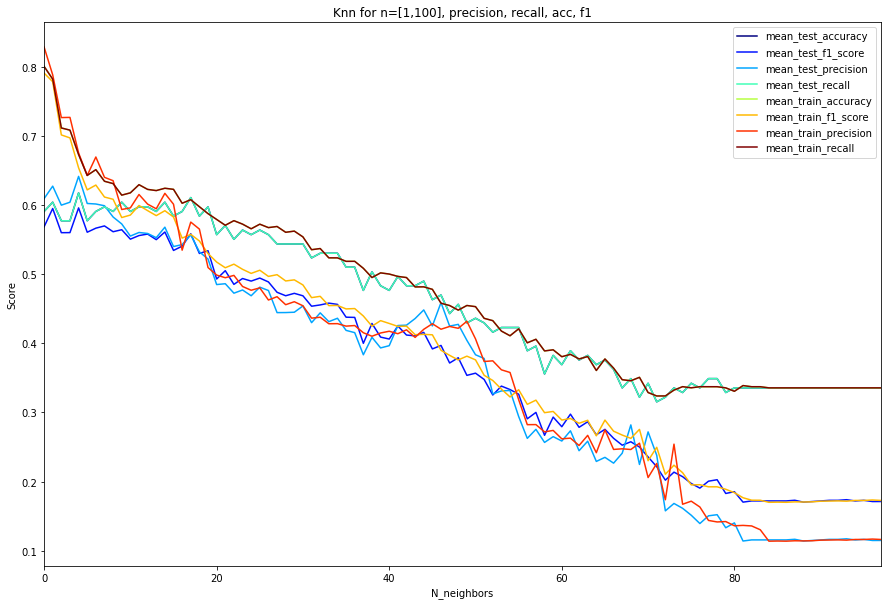

In [38]:
scoring = {'precision':make_scorer(precision_score,average='weighted'), 
           'recall': make_scorer(recall_score,average='weighted'),
           'accuracy':make_scorer(accuracy_score),
           'f1_score':make_scorer(f1_score,average='weighted')}

param_grid = {'n_neighbors':range(2,100)}

clf =  KNeighborsClassifier()
grid = GridSearchCV(clf,param_grid=param_grid,scoring=scoring,cv=5,refit='f1_score')
grid.fit(X_train,y_train)

results_raw = pd.DataFrame(grid.cv_results_)
selected_cols = [col for col in results_raw.columns.tolist() if 'mean' in col if 'time' not in col]
results = results_raw[selected_cols]
results.plot(figsize=(15,10),cmap='jet')
plt.title('Knn for n=[1,100], precision, recall, acc, f1')
plt.xlabel('N_neighbors')
plt.ylabel('Score')

In [39]:
results.max()

mean_test_accuracy      0.617450
mean_test_f1_score      0.595769
mean_test_precision     0.641324
mean_test_recall        0.617450
mean_train_accuracy     0.800343
mean_train_f1_score     0.790653
mean_train_precision    0.828348
mean_train_recall       0.800343
dtype: float64

In [28]:
results


,mean_test_accuracy,mean_test_f1_score,mean_test_precision,mean_test_recall,mean_train_accuracy,mean_train_f1_score,mean_train_precision,mean_train_recall
0,0.590604,0.568371,0.609134,0.590604,0.800343,0.790653,0.828348,0.800343
1,0.604027,0.594884,0.627230,0.604027,0.781894,0.778191,0.788068,0.781894
2,0.577181,0.559932,0.599721,0.577181,0.711325,0.701259,0.726329,0.711325
3,0.577181,0.560028,0.603960,0.577181,0.708163,0.696954,0.726589,0.708163
4,0.617450,0.595769,0.641324,0.617450,0.672919,0.653715,0.675242,0.672919
5,0.577181,0.560593,0.602173,0.577181,0.642690,0.621814,0.642689,0.642690
6,0.590604,0.566457,0.601400,0.590604,0.651040,0.628773,0.669335,0.651040
7,0.597315,0.569707,0.598878,0.597315,0.634273,0.611465,0.639961,0.634273
8,0.590604,0.561304,0.582588,0.590604,0.630895,0.608228,0.635069,0.630895
9,0.604027,0.564223,0.572577,0.604027,0.614200,0.581813,0.593437,0.614200


Part 2

SVM gets the best performance, in terms of precision, recall, accuracy and F1. Which is the best value for C, for these metrics? Report the metrics.

In [29]:
scoring = {'precision':make_scorer(precision_score,average='weighted'), 
           'recall': make_scorer(recall_score,average='weighted'),
           'accuracy':make_scorer(accuracy_score),
           'f1_score':make_scorer(f1_score,average='weighted')}

param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100] }

clf =  clf = make_pipeline(MinMaxScaler(), svm.SVC(kernel ='linear'))
grid = GridSearchCV(clf,param_grid=param_grid,scoring=scoring,cv=5,refit='f1_score')
grid.fit(X_train,y_train)

results_raw = pd.DataFrame(grid.cv_results_,index=[0.001, 0.01, 0.1, 1, 10, 100])
selected_cols = [col for col in results_raw.columns.tolist() if 'mean' in col if 'time' not in col]
results = results_raw[selected_cols]

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/l

/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_f1_score'), which will not be available 

Text(0,0.5,'Score')

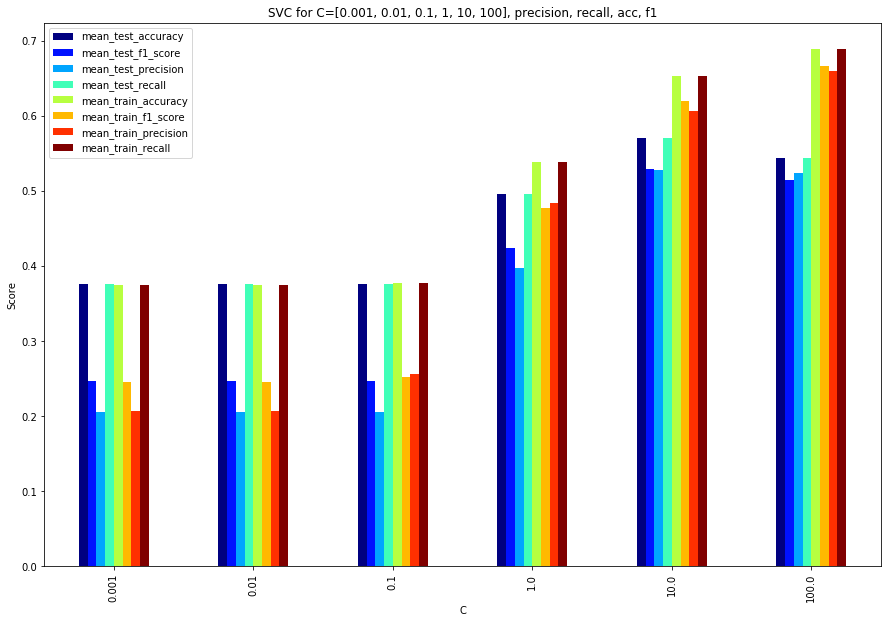

In [30]:
results.plot(kind='bar',figsize=(15,10),cmap='jet')
plt.title('SVC for C=[0.001, 0.01, 0.1, 1, 10, 100], precision, recall, acc, f1')
plt.xlabel('C')
plt.ylabel('Score')

In [31]:
results

,mean_test_accuracy,mean_test_f1_score,mean_test_precision,mean_test_recall,mean_train_accuracy,mean_train_f1_score,mean_train_precision,mean_train_recall
0.001,0.375839,0.246439,0.205778,0.375839,0.374286,0.245489,0.206404,0.374286
0.010,0.375839,0.246439,0.205778,0.375839,0.374286,0.245489,0.206404,0.374286
0.100,0.375839,0.246439,0.205778,0.375839,0.377619,0.251974,0.256054,0.377619
1.000,0.496644,0.424207,0.398089,0.496644,0.538591,0.476833,0.483407,0.538591
10.000,0.570470,0.529556,0.527474,0.570470,0.652821,0.619657,0.606816,0.652821
100.000,0.543624,0.514570,0.524569,0.543624,0.689544,0.665887,0.659376,0.689544


In [36]:
kVals = range(1, 100)
precision = []
accuracy = []
f_1 = []
recall = []

 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1,100):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
 
    # evaluate the model and update the accuracies list
    pred = knn.predict(X_test)
    
    prec = precision_score( y_test, pred, average='weighted')
    acc = accuracy_score(y_test, pred)
    f1= f1_score(y_test,pred,average='weighted')
    rec = recall_score(y_test, pred,average='weighted')
    #print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    precision.append(prec)
    accuracy.append(acc)
    f_1.append(f1)
    recall.append(rec)
    
    
i = np.argmax(precision)
print("k=%d achieved highest precision of %.2f%% on validation data" % (kVals[i],
     precision[i] )
i = np.argmax(accuracy)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
     accuracy[i] * 100))
i = np.argmax(f_1)
print("k=%d achieved highest f1 score of %.2f%% on validation data" % (kVals[i],
     f_1[i] * 100))
i = np.argmax(recall)
print("k=%d achieved highest recall of %.2f%% on validation data" % (kVals[i],
     recall[i] * 100))









SyntaxError: invalid syntax (<ipython-input-36-769b896adb6f>, line 31)

In [ ]:
plt.plot(kVals, precision, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
_ = plt.legend()##

plt.plot(kVals, accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
_ = plt.legend()##

plt.plot(kVals, f_1, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
_ = plt.legend()##

plt.plot(kVals, recall, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
_ = plt.legend()##


Part 2

In [53]:
best_score = 0
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=C)
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
print("best score: ", best_score*100)
print("best parameters: ", best_parameters)

best score:  83.0769230769
best parameters:  {'C': 10}
